In [ ]:
# This notebook has been run on Google Colab. To run it, uncomment the following lines

# !rm -r Few-shot-learning-with-HuBERT
# !git clone -b harmonics --single-branch \
# https://github.com/luckyman94/Few-shot-learning-with-HuBERT.git

# !pip install -U kagglehub

# !rm -r kagglehub_cache/


rm: cannot remove 'Few-shot-learning-with-HuBERT': No such file or directory
Cloning into 'Few-shot-learning-with-HuBERT'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 218 (delta 87), reused 193 (delta 62), pack-reused 0 (from 0)
Receiving objects: 100% (218/218), 3.76 MiB | 25.85 MiB/s, done.
Resolving deltas: 100% (87/87), done.
rm: cannot remove 'kagglehub_cache/': No such file or directory


In [ ]:

import os
import sys
from pathlib import Path
import torch
from collections import Counter
from tqdm import tqdm

# ---- Hugging Face token ----
# Uncomment the following line if you want to run the notebook on Google Colab. Make sure to replace "YOUR
#os.environ["HF_TOKEN"] = "YOUR TOKEN HERE"

# Uncomment the following lines if you want to run the notebook on Google Colab
#ROOT = Path.cwd() / "Few-shot-learning-with-HuBERT"
#sys.path.append(str(ROOT))

assert "HF_TOKEN" in os.environ
project_root = Path().resolve().parent
sys.path.append(str(project_root))


# ---- Project imports ----
from transformers import HubertModel

from src.datasets.harmonics_dataset import SyntheticAudioHarmonicsDataset
from src.methods.fewshot.benchmark import benchmark_fewshot
from src.evaluation.evaluate import evaluate_benchmark

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Few harmonics

In [4]:
dataset = SyntheticAudioHarmonicsDataset(
    n_classes=8,
    n_samples=800,
    max_harmonics=2
)

[INFO] SyntheticAudioHarmonicsDataset | 8 classes | 800 samples | Max harmonics=2


In [5]:
X = []
y = []

for waveform, label in dataset:
    X.append(waveform)
    y.append(label)

X = torch.stack(X)
y = torch.tensor(y)


print(X.shape)
print(y.shape)


torch.Size([800, 16000])
torch.Size([800])


In [6]:
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960", use_safetensors=True)
hubert.eval().to(device)

for p in hubert.parameters():
    p.requires_grad = False

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/211 [00:00<?, ?it/s]

In [7]:
results = {}
for k in [1,5,10]:
    results[k] = benchmark_fewshot(model=hubert, X=X, y=y, device=device, k_shot=k, n_tasks=100)


10-shot benchmark: 100%|██████████| 100/100 [02:09<00:00,  1.30s/it]



===== Few-shot evaluation summary =====

--- 1-shot ---
Accuracy : 0.9949 ± 0.0115
F1 macro : 0.9949


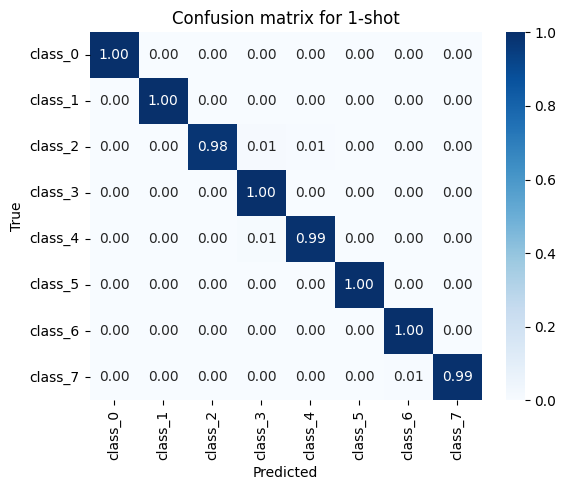


=== Evaluation metrics ===
accuracy    : 0.9949
f1_macro    : 0.9949
precision_macro: 0.9951
recall_macro: 0.9948


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


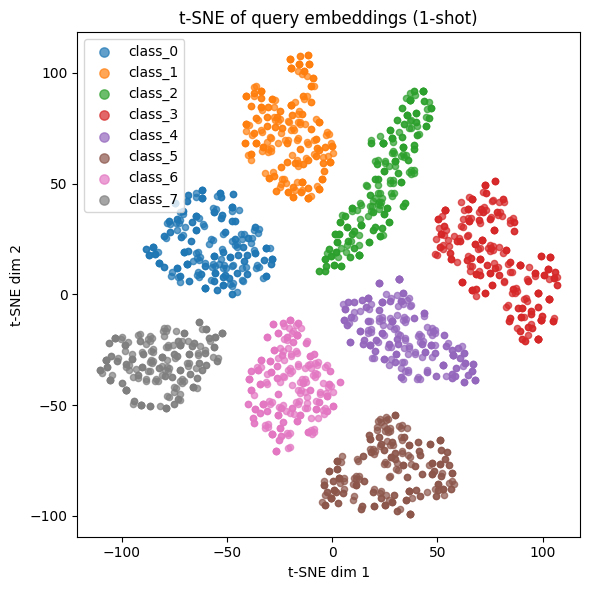


--- 5-shot ---
Accuracy : 0.9970 ± 0.0059
F1 macro : 0.9970


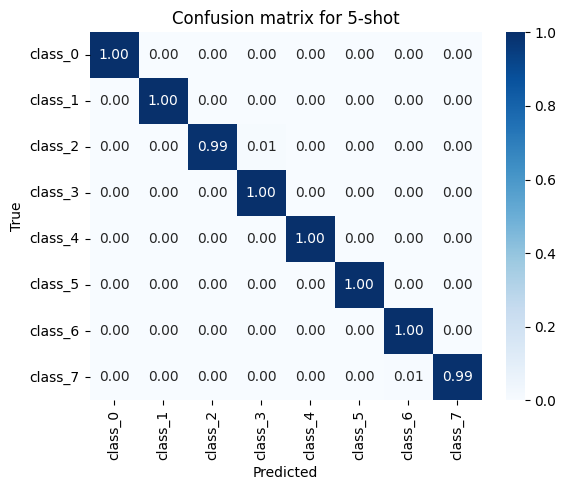


=== Evaluation metrics ===
accuracy    : 0.9970
f1_macro    : 0.9970
precision_macro: 0.9968
recall_macro: 0.9972


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


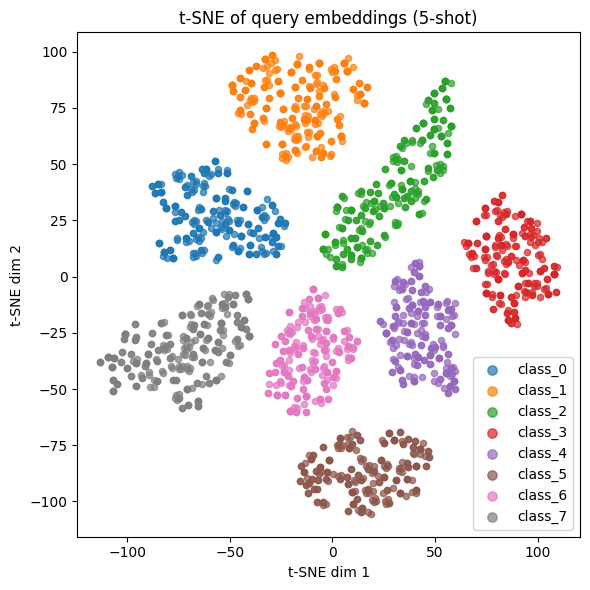


--- 10-shot ---
Accuracy : 0.9990 ± 0.0033
F1 macro : 0.9990


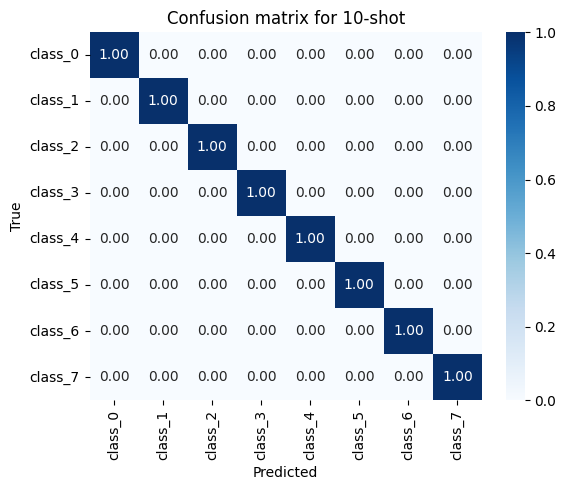


=== Evaluation metrics ===
accuracy    : 0.9990
f1_macro    : 0.9990
precision_macro: 0.9990
recall_macro: 0.9990


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


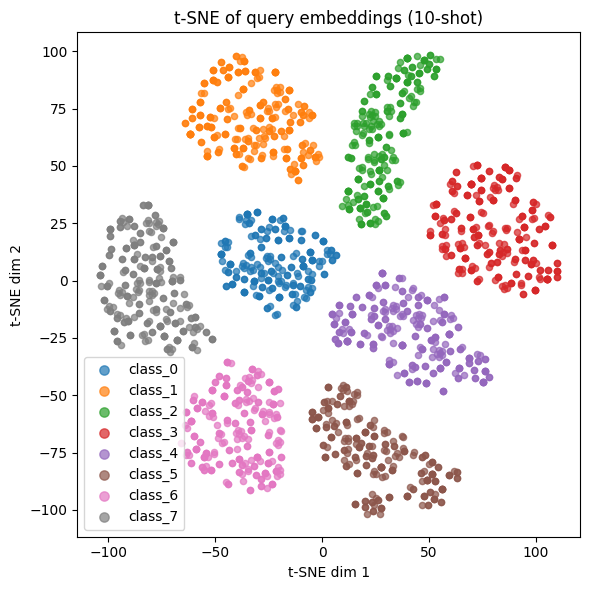

In [46]:
evaluate_benchmark(results, class_names=dataset.classes)

### Mid number of harmonics

In [8]:
dataset = SyntheticAudioHarmonicsDataset(
    n_classes=8,
    n_samples=800,
    max_harmonics=5
)

[INFO] SyntheticAudioHarmonicsDataset | 8 classes | 800 samples | Max harmonics=5


In [ ]:
X = []
y = []

for waveform, label in dataset:
    X.append(waveform)
    y.append(label)

X = torch.stack(X)
y = torch.tensor(y)


print(X.shape)
print(y.shape)


torch.Size([800, 16000])
torch.Size([800])


In [10]:
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960", use_safetensors=True)
hubert.eval().to(device)

for p in hubert.parameters():
    p.requires_grad = False

Loading weights:   0%|          | 0/211 [00:00<?, ?it/s]

In [11]:
results = {}
for k in [1,5,10]:
    results[k] = benchmark_fewshot(model=hubert, X=X, y=y, device=device, k_shot=k, n_tasks=100)


10-shot benchmark: 100%|██████████| 100/100 [02:10<00:00,  1.30s/it]



===== Few-shot evaluation summary =====

--- 1-shot ---
Accuracy : 0.7220 ± 0.1353
F1 macro : 0.6540


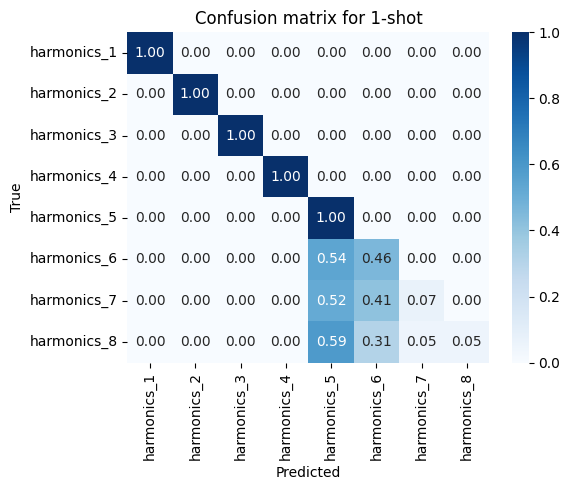


=== Evaluation metrics ===
accuracy    : 0.7220
f1_macro    : 0.6540
precision_macro: 0.7973
recall_macro: 0.6976


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


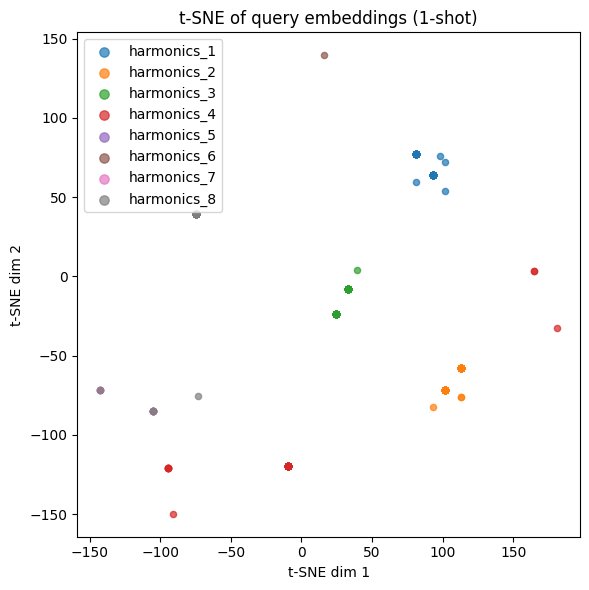


--- 5-shot ---
Accuracy : 0.7060 ± 0.1248
F1 macro : 0.6556


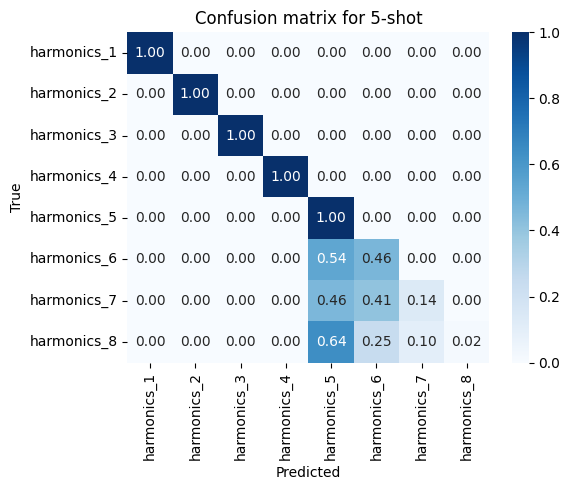


=== Evaluation metrics ===
accuracy    : 0.7060
f1_macro    : 0.6556
precision_macro: 0.7981
recall_macro: 0.7018


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


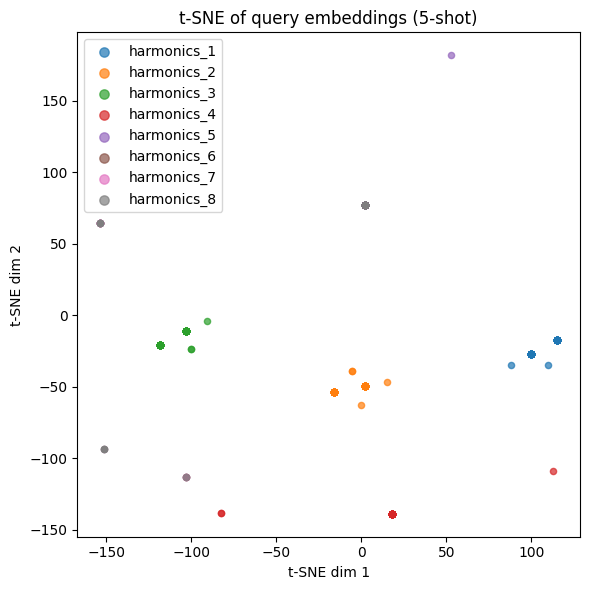


--- 10-shot ---
Accuracy : 0.6980 ± 0.1456
F1 macro : 0.6661


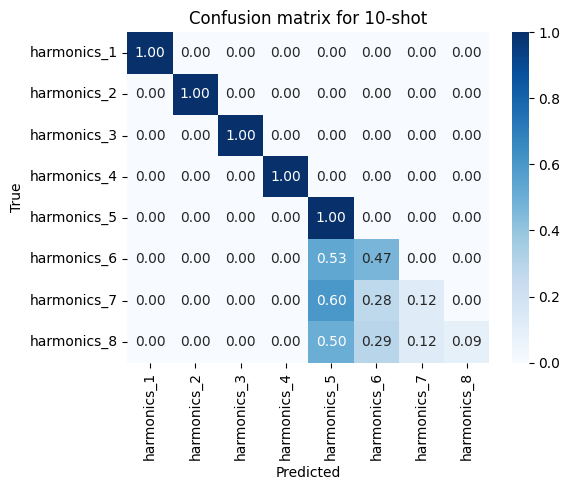


=== Evaluation metrics ===
accuracy    : 0.6980
f1_macro    : 0.6661
precision_macro: 0.7850
recall_macro: 0.7097


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


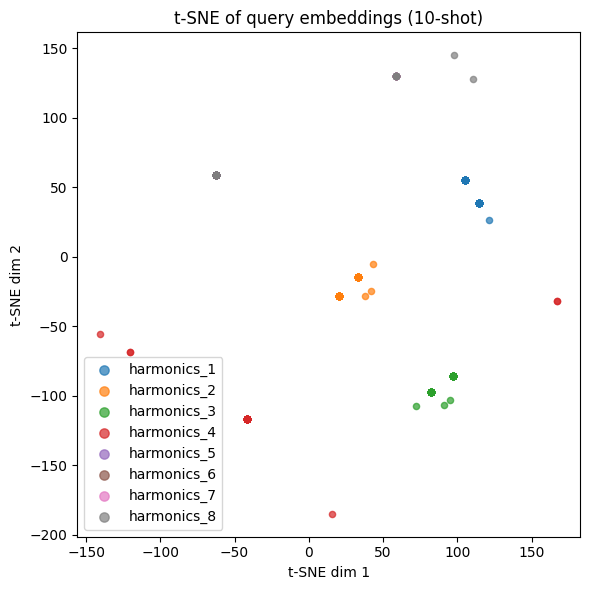

In [12]:
evaluate_benchmark(results, class_names=dataset.classes)

### High number of harmonics

In [13]:
dataset = SyntheticAudioHarmonicsDataset(
    n_classes=8,
    n_samples=800,
    max_harmonics=10
)

[INFO] SyntheticAudioHarmonicsDataset | 8 classes | 800 samples | Max harmonics=10


In [14]:
X = []
y = []

for waveform, label in dataset:
    X.append(waveform)
    y.append(label)

X = torch.stack(X)
y = torch.tensor(y)


print(X.shape)
print(y.shape)


torch.Size([800, 16000])
torch.Size([800])


In [15]:
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960", use_safetensors=True)
hubert.eval().to(device)

for p in hubert.parameters():
    p.requires_grad = False

Loading weights:   0%|          | 0/211 [00:00<?, ?it/s]

In [16]:
results = {}
for k in [1,5,10]:
    results[k] = benchmark_fewshot(model=hubert, X=X, y=y, device=device, k_shot=k, n_tasks=100)


10-shot benchmark: 100%|██████████| 100/100 [02:10<00:00,  1.31s/it]



===== Few-shot evaluation summary =====

--- 1-shot ---
Accuracy : 1.0000 ± 0.0000
F1 macro : 1.0000


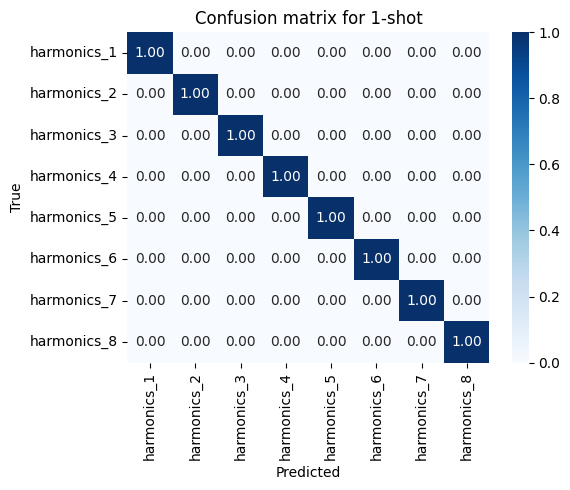


=== Evaluation metrics ===
accuracy    : 1.0000
f1_macro    : 1.0000
precision_macro: 1.0000
recall_macro: 1.0000


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


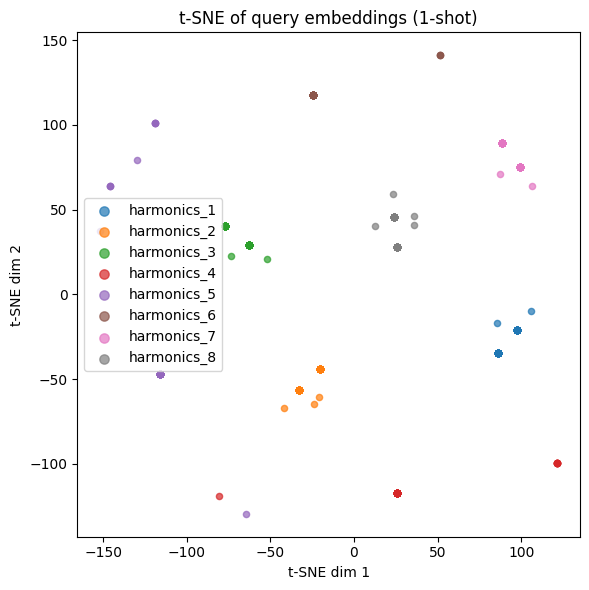


--- 5-shot ---
Accuracy : 1.0000 ± 0.0000
F1 macro : 1.0000


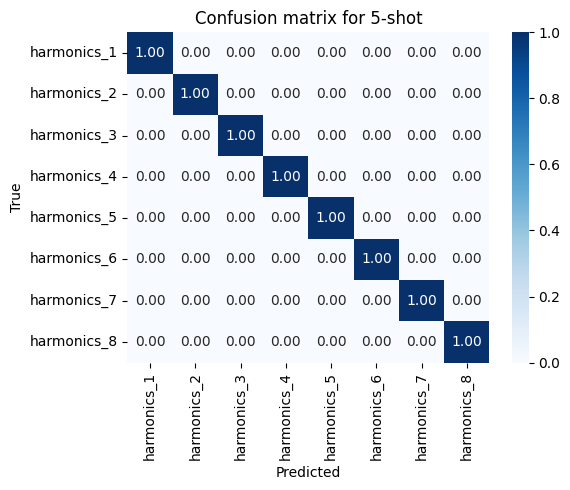


=== Evaluation metrics ===
accuracy    : 1.0000
f1_macro    : 1.0000
precision_macro: 1.0000
recall_macro: 1.0000


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


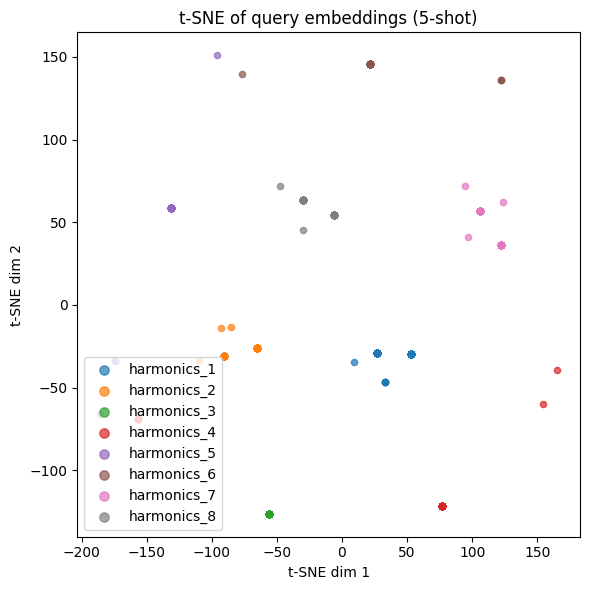


--- 10-shot ---
Accuracy : 1.0000 ± 0.0000
F1 macro : 1.0000


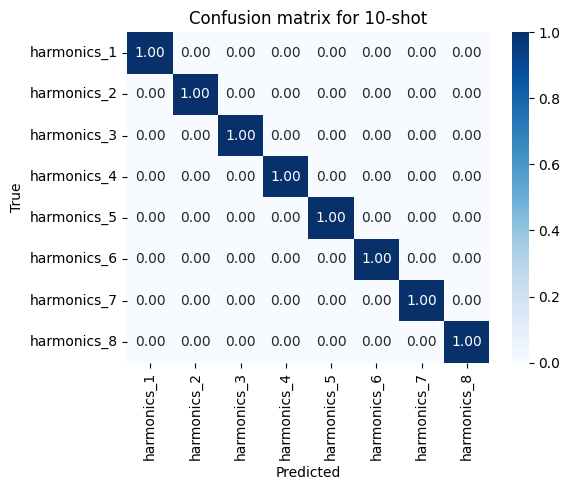


=== Evaluation metrics ===
accuracy    : 1.0000
f1_macro    : 1.0000
precision_macro: 1.0000
recall_macro: 1.0000


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


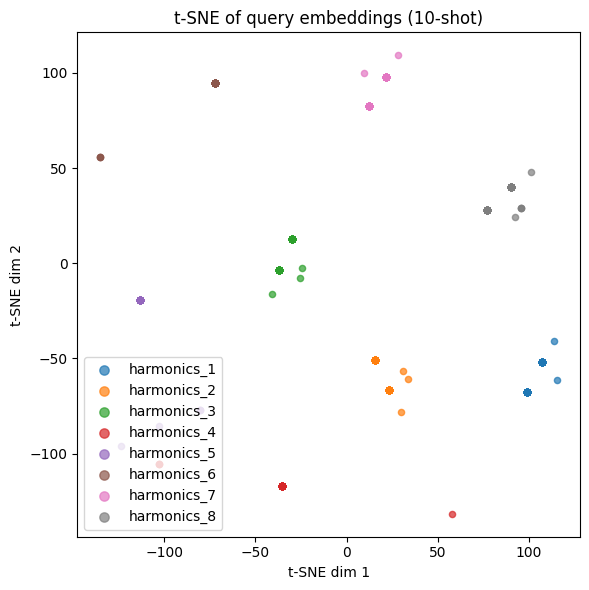

In [17]:
evaluate_benchmark(results, class_names=dataset.classes)